# View DICOM image objects

In this exercise we'll load a part 10 DICOM file and preview its image

In [ ]:
!pip install matplotlib
!pip install pydicom
!pip install python-gdcm


checkout project for sample objects

In [ ]:
!git clone https://github.com/petrovanster/dicom_intro.git

Let's load an object

In [2]:
import pydicom

ds = pydicom.dcmread("dicom_intro/data/democases/case1/case1_008.dcm")

print(f"{ds.Rows}x{ds.Columns}")

512x512


In [6]:
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 138
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Ultrasound Multi-frame Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 999.999.133.1996.1.1800.1.6.29
(0002, 0010) Transfer Syntax UID                 UI: RLE Lossless
(0002, 0012) Implementation Class UID            UI: 999.999.332346
-------------------------------------------------
(0008, 0000) Group Length                        UL: 226
(0008, 0008) Image Type                          CS: ''
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID                    UI: 999.999.133.1996.1.1800.1.6.29
(0008, 0020) Study Date                          DA: '19940323'
(0008, 0030) Study Time                          TM: '115104.0'
(0008, 0050) Accession Number                    SH: ''

# Display the image

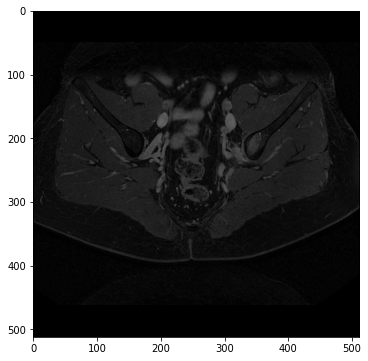

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
plt.imshow(ds.pixel_array, cmap=plt.cm.gray, vmin=0, vmax = 2 ** 12 -1)
plt.show()

Compute the histogram

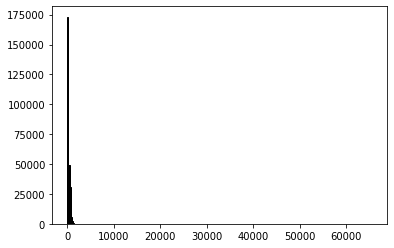

In [25]:
plt.hist(ds.pixel_array.ravel(), bins=256, range=(0.0, 2**ds.BitsAllocated-1), fc='k', ec='k')
plt.show()

much better! let's see if there's some windowing recommended

In [20]:
print(f"windowing center:{ds.WindowCenter} width: {ds.WindowWidth}")

windowing center:1112.0 width: 2223.0


ok, let's window the histogram

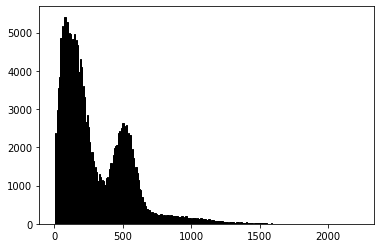

In [26]:
plt.hist(ds.pixel_array.ravel(), bins=256, range=(ds.WindowCenter-ds.WindowWidth/2, ds.WindowCenter+ds.WindowWidth/2), fc='k', ec='k')
plt.show()

window image and display both

# Windowing



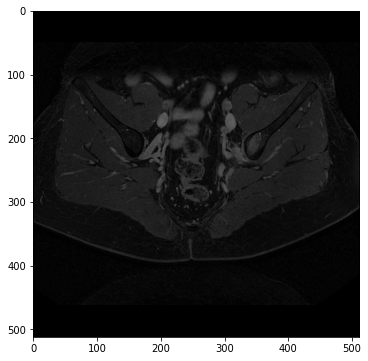

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
plt.imshow(ds.pixel_array, cmap=plt.cm.gray, vmin=0, vmax = 2 ** 12 -1)
plt.show()

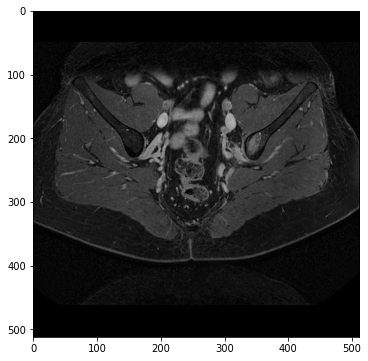

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize = (6,6))
plt.imshow(ds.pixel_array, cmap=plt.cm.gray, vmin=(ds.WindowCenter-ds.WindowWidth/2), vmax = ds.WindowCenter+ds.WindowWidth/2)
plt.show()